<a href="https://colab.research.google.com/github/machida4/DEEP_LEARNING_with_Python/blob/master/DEEP_LEARNING_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NN

In [ ]:
import tensorflow as tf

In [ ]:
class NaiveDense:
  def __init__(self, input_size, output_size, activation):
    self.activation = activation

    # (input_size, output_size),初期値が乱数の行列W
    w_shape = (input_size, output_size)
    w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
    self.W = tf.Variable(w_initial_value)

    # (output_size,),初期値が0のベクトルb
    b_shape = (output_size,)
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, inputs):
    return self.activation(tf.matmul(inputs, self.W) + self.b)
  
  @property
  def weights(self):
    return [self.W, self.b]

class NaiveSequential:
  def __init__(self, layers):
    self.layers = layers

  def __call__(self, inputs):
    x = inputs
    for layer in self.layers:
      x = layer(x)
    return x
  
  @property
  def weights(self):
    weights = []
    for layer in self.layers:
      weights += layer.weights
    return weights

In [ ]:
model = NaiveSequential([
  NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
  NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])

assert len(model.weights) == 4

In [ ]:
import math

class BatchGenerator:
  def __init__(self, images, labels, batch_size=128):
    assert len(images) == len(labels)
    self.index = 0
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.num_batches = math.ceil(len(images) / batch_size)
  
  def next(self):
    images = self.images[self.index : self.index + self.batch_size]
    labels = self.labels[self.index : self.index + self.batch_size]
    self.index += self.batch_size
    return images, labels

In [ ]:
learning_rate = 1e-3

def one_training_step(model, images_batch, labels_batch):
  # forward-path
  with tf.GradientTape() as tape:
    predictions = model(images_batch)
    per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
    average_loss = tf.reduce_mean(per_sample_losses)

    # 勾配のリスト
    # model.weightsの各重みに対応
    gradients = tape.gradient(average_loss, model.weights)
    
    # gradientsを使って重みを更新する
    update_weights(gradients, model.weights)
    return average_loss

def update_weights(gradients, weights):
  for g, w, in zip(gradients, weights):
    w.assign_sub(g * learning_rate) # -=

def fit(model, images, labels, epochs, batch_size=128):
  for epoch_counter in range(epochs):
    print(f"Epoch {epoch_counter}")
    batch_generator = BatchGenerator(images, labels)
    for batch_counter in range(batch_generator.num_batches):
      images_batch, labels_batch = batch_generator.next()
      loss = one_training_step(model, images_batch, labels_batch)
      if batch_counter % 100 == 0:
        print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=20, batch_size=128)

Epoch 0
loss at batch 0: 0.63
loss at batch 100: 0.65
loss at batch 200: 0.56
loss at batch 300: 0.63
loss at batch 400: 0.71
Epoch 1
loss at batch 0: 0.60
loss at batch 100: 0.61
loss at batch 200: 0.52
loss at batch 300: 0.60
loss at batch 400: 0.68
Epoch 2
loss at batch 0: 0.57
loss at batch 100: 0.58
loss at batch 200: 0.50
loss at batch 300: 0.57
loss at batch 400: 0.66
Epoch 3
loss at batch 0: 0.55
loss at batch 100: 0.55
loss at batch 200: 0.47
loss at batch 300: 0.55
loss at batch 400: 0.64
Epoch 4
loss at batch 0: 0.53
loss at batch 100: 0.53
loss at batch 200: 0.45
loss at batch 300: 0.53
loss at batch 400: 0.62
Epoch 5
loss at batch 0: 0.51
loss at batch 100: 0.50
loss at batch 200: 0.43
loss at batch 300: 0.51
loss at batch 400: 0.61
Epoch 6
loss at batch 0: 0.49
loss at batch 100: 0.49
loss at batch 200: 0.42
loss at batch 300: 0.50
loss at batch 400: 0.59
Epoch 7
loss at batch 0: 0.48
loss at batch 100: 0.47
loss at batch 200: 0.40
loss at batch 300: 0.49
loss at batch 40

In [ ]:
import numpy as np

predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Keras

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.9100631]
 [-0.549231 ]
 [-0.5124434]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.62228346]
 [0.5353415 ]
 [0.8448949 ]], shape=(3, 1), dtype=float32)


In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
import numpy as np

num_samples_per_class = 1000
cov = [[1, 0.5], [0.5, 1]]
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=cov, size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=cov, size=num_samples_per_class)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

In [ ]:
import matplotlib.pyplot as plt

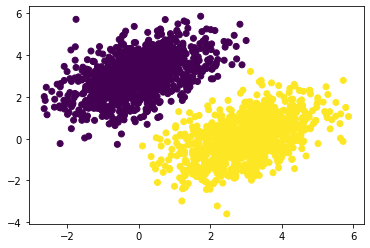

In [ ]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [ ]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [ ]:
def model(inputs):
  return tf.matmul(inputs, W) + b

# 損失関数（平均二重誤差）
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  
  grad_loss_W, grad_loss_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_W * learning_rate)
  b.assign_sub(grad_loss_b * learning_rate)
  
  return loss

In [ ]:
for step in range(300):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:4f}")

Loss at step 0: 0.025097
Loss at step 1: 0.025097
Loss at step 2: 0.025097
Loss at step 3: 0.025097
Loss at step 4: 0.025097
Loss at step 5: 0.025097
Loss at step 6: 0.025097
Loss at step 7: 0.025097
Loss at step 8: 0.025097
Loss at step 9: 0.025097
Loss at step 10: 0.025097
Loss at step 11: 0.025097
Loss at step 12: 0.025097
Loss at step 13: 0.025097
Loss at step 14: 0.025097
Loss at step 15: 0.025097
Loss at step 16: 0.025097
Loss at step 17: 0.025097
Loss at step 18: 0.025097
Loss at step 19: 0.025097
Loss at step 20: 0.025097
Loss at step 21: 0.025097
Loss at step 22: 0.025097
Loss at step 23: 0.025097
Loss at step 24: 0.025097
Loss at step 25: 0.025097
Loss at step 26: 0.025097
Loss at step 27: 0.025097
Loss at step 28: 0.025097
Loss at step 29: 0.025097
Loss at step 30: 0.025097
Loss at step 31: 0.025097
Loss at step 32: 0.025097
Loss at step 33: 0.025097
Loss at step 34: 0.025097
Loss at step 35: 0.025097
Loss at step 36: 0.025097
Loss at step 37: 0.025097
Loss at step 38: 0.025

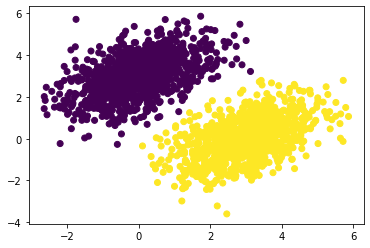

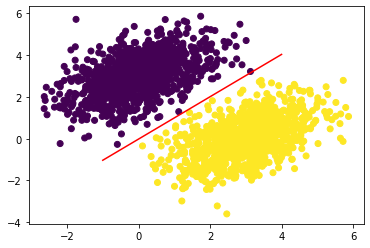

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## IMDb

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
# 試しにレビューをテキストに戻してみる
word_index = imdb.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
docoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(docoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [ ]:
import numpy as np

# multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
  # (len(sequences), dimension)の0埋め行列
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

# レビューをmulti-hot encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# ラベルをベクトル化(0:negative, 1:positive)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")])

In [ ]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# 検証セット
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 69ms/step - loss: 0.5176 - accuracy: 0.7679 - val_loss: 0.3891 - val_accuracy: 0.8610
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3079 - accuracy: 0.8985 - val_loss: 0.3059 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2332 - accuracy: 0.9212 - val_loss: 0.2820 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1851 - accuracy: 0.9399 - val_loss: 0.3258 - val_accuracy: 0.8709
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1558 - accuracy: 0.9500 - val_loss: 0.3158 - val_accuracy: 0.8737
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1322 - accuracy: 0.9604 - val_loss: 0.3116 - val_accuracy: 0.8755
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1138 - accuracy: 0.9655 - val_loss: 0.3019 - val_accuracy: 0.8822
Epoch 8/20
30

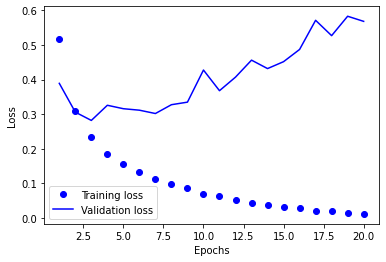

In [ ]:
# 訓練データと検証データでの損失値をプロット
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
# 青のドットでプロット
plt.plot(epochs, loss_values, "bo", label="Training loss")
# 青の実線でプロット
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

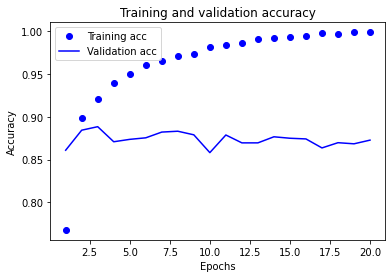

In [ ]:
# 訓練データと検証データでの正解率をプロット
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.01215919],
       [0.99999976],
       [0.7186963 ],
       ...,
       [0.00208633],
       [0.00770024],
       [0.948805  ]], dtype=float32)

## Reuters

In [ ]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# one-hot encoding
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
model = keras.Sequential([layers.Dense(64, activation="relu"),
                          layers.Dense(64, activation="relu"),
                          layers.Dense(46, activation="softmax")])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 36ms/step - loss: 2.7999 - accuracy: 0.4994 - val_loss: 1.8743 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5683 - accuracy: 0.6828 - val_loss: 1.3997 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.2119 - accuracy: 0.7306 - val_loss: 1.2238 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0051 - accuracy: 0.7796 - val_loss: 1.1296 - val_accuracy: 0.7390
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8445 - accuracy: 0.8176 - val_loss: 1.0590 - val_accuracy: 0.7660
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7083 - accuracy: 0.8532 - val_loss: 0.9894 - val_accuracy: 0.7850
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5990 - accuracy: 0.8728 - val_loss: 0.9638 - val_accuracy: 0.7870
Epoch 8/20
16

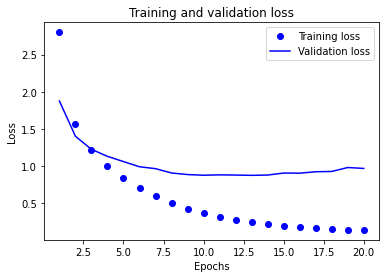

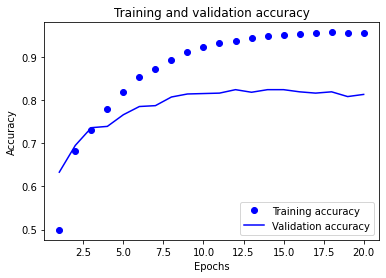

In [ ]:
# lossをプロット
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# accuracyをプロット
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(x_test)
print(predictions.shape)
np.sum(predictions[0])
np.argmax(predictions[0])

71/71 [==============================] - 0s 4ms/step
(2246, 46)


3

## CV

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         7385

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.1357 - accuracy: 0.9569
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0389 - accuracy: 0.9885
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0272 - accuracy: 0.9916
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0212 - accuracy: 0.9935
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0162 - accuracy: 0.9949


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0208 - accuracy: 0.9937
Test accuracy: 0.994


In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"machida4","key":"a96930add262121eae8d93027d36baef"}'}

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
# Dogs vs. Catsデータセットをダウンロード
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:44<00:00, 24.1MB/s]
100% 812M/812M [00:44<00:00, 19.3MB/s]


In [11]:
!pwd
!unzip -qq dogs-vs-cats.zip

/content


In [12]:
!unzip -qq train.zip

In [13]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [29]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [30]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                       

In [31]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [15]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(new_base_dir / "train", image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation", image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / "test", image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [33]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras", save_best_only=True, monitor="val_loss")
]

history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 19s 94ms/step - loss: 0.6954 - accuracy: 0.5240 - val_loss: 0.6905 - val_accuracy: 0.5290
Epoch 2/30
63/63 [==============================] - 6s 87ms/step - loss: 0.6991 - accuracy: 0.5505 - val_loss: 0.6796 - val_accuracy: 0.5970
Epoch 3/30
63/63 [==============================] - 4s 65ms/step - loss: 0.6774 - accuracy: 0.5860 - val_loss: 0.7279 - val_accuracy: 0.5070
Epoch 4/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6400 - accuracy: 0.6140 - val_loss: 0.7020 - val_accuracy: 0.5450
Epoch 5/30
63/63 [==============================] - 6s 88ms/step - loss: 0.6000 - accuracy: 0.6690 - val_loss: 0.6756 - val_accuracy: 0.6230
Epoch 6/30
63/63 [==============================] - 4s 65ms/step - loss: 0.5942 - accuracy: 0.6870 - val_loss: 0.5949 - val_accuracy: 0.6670
Epoch 7/30
63/63 [==============================] - 6s 87ms/step - loss: 0.5707 - accuracy: 0.7115 - val_loss: 0.5778 - val_accuracy: 0.6950
Epoch 8/30
6

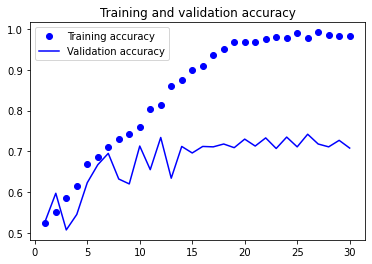

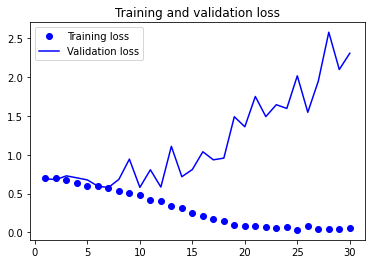

In [34]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [36]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 33ms/step - loss: 0.6008 - accuracy: 0.6745
Test accuracy: 0.674


In [38]:
# データ拡張層
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

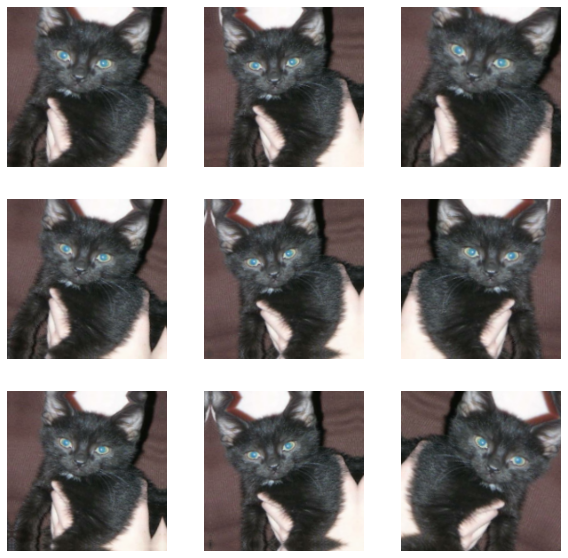

In [40]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [43]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [44]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch_with_augmentation.keras", save_best_only=True, monitor="val_loss")
]

history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/100


63/63 [==============================] - 21s 236ms/step - loss: 0.7242 - accuracy: 0.5275 - val_loss: 0.6929 - val_accuracy: 0.4990
Epoch 2/100
63/63 [==============================] - 15s 228ms/step - loss: 0.6992 - accuracy: 0.5120 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 16s 251ms/step - loss: 0.7108 - accuracy: 0.5450 - val_loss: 0.6884 - val_accuracy: 0.5020
Epoch 4/100
63/63 [==============================] - 16s 246ms/step - loss: 0.6766 - accuracy: 0.5910 - val_loss: 0.6584 - val_accuracy: 0.5970
Epoch 5/100
63/63 [==============================] - 15s 228ms/step - loss: 0.6609 - accuracy: 0.6335 - val_loss: 0.6446 - val_accuracy: 0.6370
Epoch 6/100
63/63 [==============================] - 16s 243ms/step - loss: 0.6406 - accuracy: 0.6335 - val_loss: 0.6435 - val_accuracy: 0.6270
Epoch 7/100
63/63 [==============================] - 14s 226ms/step - loss: 0.6071 - accuracy: 0.6650 - val_loss: 0.7399 - val_accuracy: 0.6040
Epoc

## CV (conv base)

In [16]:
## 畳み込みベースを実行して特徴量を抽出

import numpy as np

conv_base = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(180, 180, 3))
conv_base.summary()

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [17]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 24ms/step


In [18]:
train_features.shape

(2000, 5, 5, 512)

In [19]:
inputs = keras.Input(shape=(5, 5, 512))

x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="feature_extracation.keras", save_best_only=True, monitor="val_loss")
] 
history = model.fit(train_features, train_labels, epochs=20, validation_data=(val_features, val_labels), callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 13ms/step - loss: 19.3176 - accuracy: 0.9095 - val_loss: 5.6204 - val_accuracy: 0.9640
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 2.3152 - accuracy: 0.9825 - val_loss: 6.1584 - val_accuracy: 0.9630
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.8669 - accuracy: 0.9865 - val_loss: 4.6636 - val_accuracy: 0.9730
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8378 - accuracy: 0.9910 - val_loss: 6.2092 - val_accuracy: 0.9680
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.9930 - val_loss: 5.4731 - val_accuracy: 0.9710
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9224 - accuracy: 0.9930 - val_loss: 4.8813 - val_accuracy: 0.9690
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.4144 - accuracy: 0.9945 - val_loss: 7.7492 - val_accuracy: 0.9620
Epoch 8/20
63/63 [

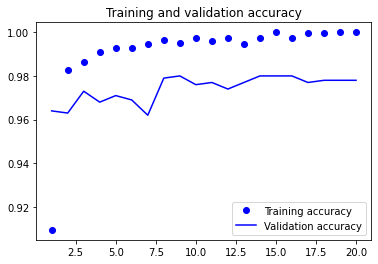

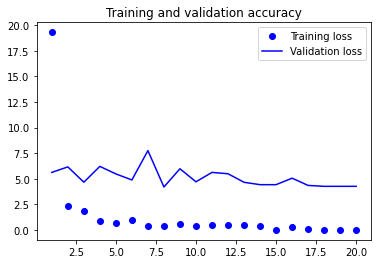

In [22]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

In [23]:
# 最後にDense層を追加してデータ拡張
# TODO